In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [147]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from tensorflow.keras.losses import SparseCategoricalCrossentropy,mse,mae
import matplotlib.pyplot as plt
import numpy as np



In [250]:
model = Sequential([
    Sequential([ Dense(units=64, activation="sigmoid"),

                Dense(units=40, activation='sigmoid'),
                 Dense(units=10,activation='sigmoid'),
                 Dense(units=1, activation='linear')])
])

In [251]:
data=pd.read_csv("BostonHousing.csv")
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [242]:
data.isnull().sum()
X=data[['crim','tax','age']].values
y=data['medv'].values
X=(X-X.mean())/X.std()


In [243]:
X

array([[-0.78877114,  0.66918925, -0.46765009],
       [-0.78866776,  0.40320431, -0.40016872],
       [-0.78866785,  0.40320431, -0.48784524],
       ...,
       [-0.78850299,  0.55589936, -0.3405684 ],
       [-0.78826247,  0.55589936, -0.348942  ],
       [-0.78856875,  0.55589936, -0.39080999]])

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)


In [245]:
model.compile(loss='mse')

In [246]:
model.fit(X_train,y_train)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 522.6002


In [247]:
new=np.array([[0.00632,296,65.2]])

In [248]:
 model.predict(new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[1.3147119]], dtype=float32)

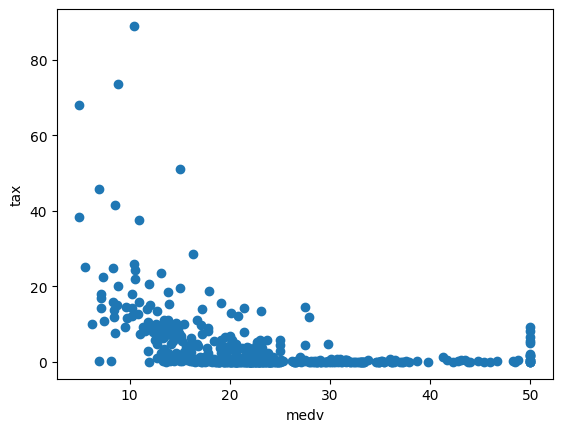

In [254]:
plt.scatter(y,data[['crim']])
plt.xlabel('medv')
plt.ylabel('tax')
plt.show()